Title: Bayesian Parameter Estimation
Author: Thomas Breuel
Institution: UniKL

In [1]:

from scipy import stats
from scipy.stats import norm

Parameter Estimation
======================

Assume we are given a samples from a Gaussian:

$$p(x) = \sigma^{-1} (2\pi)^{-1/2} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

You already know the formulas for estimating means and variances of Gaussians:

$$\mu \approx \hat{\mu} = \bar{x} = {1 \over n} \sum_{k=1}^n x_k $$

$$\sigma^2 \approx \hat{\sigma}^2 = \bar{(x-\bar{x})^2} = {1 \over n} \sum_{k=1}^n (x_k-\bar{x})$$

We're asking the following questions here:

- Where do these formulas come from?
- Are they "correct"?
- Are they the whole story?

The $x_k$ above are an i.i.d. sample from the original sample density:

$$D=\{x_1,\ldots,x_n\}$$

We want to estimate the parameters of the density $p(x)$.  
Let's call the parameters generically $\theta$.
For the univariate normal density, $\theta = (\mu,\sigma)$.

$$p(x_i) = p(x,\theta) = p(x|\theta)$$

Now we can write a density for the entire dataset:

$$ p(D|\theta) = p(x_1,\ldots,x_n|\theta) = p(x_1|\theta)\cdot\ldots\cdot p(x_n|\theta) = \prod_{i=1}^n p(x_i|\theta)$$

We call $\ell(\theta) = p(D|\theta)$ the _likelihood_ of the data.
Note that likelihoods are parameterized densities viewed as functions of the parameters.

Maximum Likelihood Estimate
============================

The _maximum likelihood estimate_ is given by:

$$\hat{\theta} = \arg\max_\theta ~ p(D|\theta)$$

This seems like a reasonable thing to do: choose the parameter that was
most likely to produce the data set.

However, in general, there is little reason why the maximum of the likelihood function
should mean anything.
For example, we can easily modify the likelihood function to put a tiny spike in it
that moves the maximum somewhere arbitrary without actually changing the problem much at all.

Maximum A Posteriori Estimate
=============================

By analogy to Bayesian methods, we can also ``multiply in'' a prior:

$$\hat{\theta} = \arg\max_\theta ~ p(D|\theta) p(\theta)$$

This is called the _maximum a-posterior estimate_ (MAP) for the parameter $\theta$.

MAP vs Bayesian Methods
========================

Although MAP looks like the derivation may have involved _Bayes rule_, it is
not a Bayesian method at all.
Bayesian methods are *not* methods that involve Bayes rule somewhere.

**Bayesian methods are methods that result in decisions that minimize expected loss.**

In order to minimize expected loss, you actually need a loss function.
Maximum likelihood or MAP estimation does not attempt to minimize a loss function,
hence it is not a Bayesian method.
For individual distributions, ML or MAP estimation may implicitly optimize some loss
function, but that loss function may depend on the distribution, sample size, and parameters.

Maximum Likelihood Estimation of the Mean of a Normal Density
=========================================

Let's derive a maximum likelihood estimator, for the mean of a Gaussian
we want to maximize the likelihood function:

$p(x_1,...,x_n|\mu)=\prod_i p(x_i|\mu)$

Let's take logarithms

$$l(\mu) = \sum_i p(x_i|\mu) = \sum -{1\over 2} \ln((2\pi)^d |\Sigma|) - {1\over 2} (x_i-\mu)\Sigma^{-1}(x_i-\mu)$$

If $l$ is sufficiently well behaved (it is), then a necessary condition for a local maximum is that the gradient in the parameter to be estimated is 0

$$\nabla_\mu l(\mu) = 0$$

The gradient is

$$\nabla_\mu l(\mu) = \sum_i \Sigma^{-1} (x_i-\mu)$$

So,

$$\nabla_\mu l(\hat{\mu}) = \sum_i \Sigma^{-1} (x_i-\hat{\mu}) = 0$$

Multiply by $\Sigma$

$$\sum_i (x_i-\hat{\mu}) = 0$$

$$\sum_i x_i = n\cdot\hat{\mu}$$

$$\hat{\mu} = {1 \over n} \sum_{i=1}^n x_i$$

This is nice because it says that the maximum likelihood estimate of the mean of a Gaussian is just the arithmetic mean of the samples (the empirical mean or sample mean).


Example
=======

Let's try this out in 1D.

We assume that $\sigma=1$

In [3]:
D = randn(10)

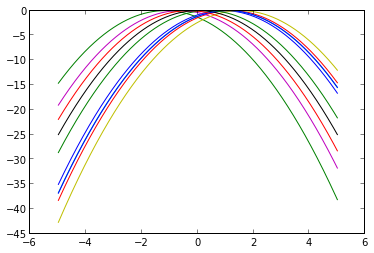

In [11]:
mus = linspace(-5,5,10000)
l_of_mu = [-(x-mus)**2 for x in D]
for l in l_of_mu: plot(mus,l)

0.398539853985

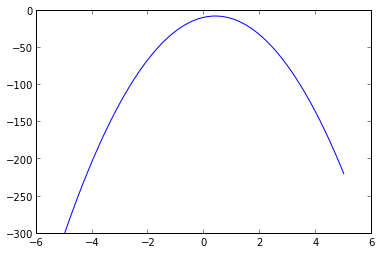

In [12]:
l = sum(array(l_of_mu),0)
plot(mus,l)
print mus[argmax(l)]

In [13]:
mean(D)

0.39899698828239921

ML estimator of Mean and Variance
=================================

Consider the 1D Gaussian, but assume that we want to estimate both $\mu$ and $\sigma^2$

Let's use the variance $v=\sigma^2$

The log likelihood is

$$l(\mu,\sigma^2) = \sum_i^n \ln p(x_i|\mu,v) = -{1\over2} \ln 2\pi v - {1 \over {2v}} (x_i - \mu)^2$$

As before, to find a potential maximum, 
we calculate the derivatives of the log likelihood function and set them equal to zero

$$\frac{\partial}{\partial\mu} l =  \sum_i^n {1 \over {\hat{v}}} (x_i - \hat{\mu}) = 0$$

$$\frac{\partial}{\partial v} l =  \sum_i^n - {1\over {2\hat{v}}} + \frac{(x_i-\hat{\mu})^2}{2\hat{v}^2} = 0$$

So, from the first, we obtain again that

$$\hat{\mu} = {1 \over n} \sum_i^n x_i$$

For the second, we get

$$\frac{\partial}{\partial\hat{v}} l =  \sum_i^n - {1\over {2\hat{v}}} + \frac{(x_i-\hat{\mu})^2}{2\hat{v}^2} = 0$$

Multiply by $v^2$, we get

$$ n v  = \sum_i^n (x_i-\hat{\mu})^2 $$

Or

$$ \sigma^2 = v = \frac{1}{n} \sum_i^n (x_i-\hat{\mu})^2 $$

Bias
====

Above, we calculated the maximum likelihood estimate of the variance.

Wouldn't it be nice if the variance were actually, on average, the same a the true variance?

Let's see whether that is true.

The expected value of the variance is

$$E[\frac{1}{n}\sum_i^n (x_i-\bar{x})]$$

Consider the case $n=1$.

Then $\bar{x} = \hat{\mu} = x_1$, so

$$E[\frac{1}{1}\sum_{i=1}^1 (x_1-x_1)] = 0$$

Well, $0 \neq \sigma^2$

Tt turns out that an unbiased estimator for variance is

$$E[\frac{1}{n-1}\sum_i^n (x_i-\bar{x})]$$

Note that this is undefined for $n=1$, so the above problem doesn't exist.

Some terminology:

- If an estimator is not completely unbiased but becomes approximately unbiased 
for large $n$, we call it {\em asymptotically unbiased}
- If an estimator is unbiased for all distributions, it is called {\em absolutely unbiased}.

So, we now have two different estimators for the variance:

- the first one maximizes the likelihood
- the second one has an expected value that equals the true value

Which one should we choose?

There is no correct answer; the question itself is wrong.

The reason is that our knowledge about the true variance is uncertain.
Any single value we estimate for the variance is incomplete 
without a statement of the uncertainty associated with that value

The point here is not that you should pick unbiased estimators (you may still choose
to do so if you have nothing better to do), rather it is to illustrate that
there are many choices in statistics that sound good on the surface but really 
don't accomplish anything useful.

Bayesian Parameter Estimation
=============================

In Bayesian parameter estimation, we need to decide what purpose we want 
to use the estimate for.

For example, we might want to estimate the parameters of a normal
density in order to perform classification.

In a Bayesian approach, we use all available data:

$$p(\omega_j|x) = p(\omega_j|x,D)$$

In order to perform estimation, we consider the case where...

- the form of the density $p(x|\theta)$ is known (parametric estimation)
- we assume that samples for each class can only give us information about that class
- assume we have a prior density $p(\theta)$ for the parameters

Then

$$p(x|D) = \int p(x|\theta) p(\theta|D) d\theta$$

Now by Bayes formula,

$$p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)}$$

and by independence

$$p(D|\theta) = \prod_{k=1}^n p(x_k|\theta)$$

Note that the maximum likelihood case is equivalent to this if we choose 

$p(\theta|D)=\delta(\theta,\hat{\theta})$

$$p(x|\omega_j,D) = \int p(x|\theta) \delta(\theta,\hat{\theta}) d\theta$$

Whether the maximum likelihood solution works well therefore depends on how
closely $p(\theta|D)$ approximates a $\delta(\theta,\hat{\theta})$ 
(note that "how closely" depends also on the smoothness of $p(x|\theta)$)


Parameter Updates
=================

Above, we have seen how to compute distributions of parameters given
some samples.

In many cases, it turns out that the distribution of parameters itself
has a parameteric form closely related to the parametric form of the
distribution we are trying to estimate.

For example, the distribution of the estimates of a mean of a Gaussian
is itself a Gaussian.

For now, let's look at a particularly simple case.
Assume we are given $p(\theta)$ and a measurement $x$
we want to compute $p(\theta|x)$, the distribution of the parameter values
assuming we are given a measurement.

So
$$p(\theta|x) = \frac{p(x|\theta) p(\theta)}{p(x)}$$

Here,
$$p(x) = \int p(x|\theta) p(\theta) dx$$

Let's look at this in the case of estimating the probability parameter 
of a binomial distribution.

For a given $q$, we have $p(k) = {n \choose k} \theta^k (1-\theta)^{n-k}$
(the parameter $\theta$ is just the probabilit; I'm avoiding writing $p$ because we have too many $p$'s already)
since, initially, we know nothing about $\theta$, let's assume a uniform prior

$p(\theta) = 1$ 

this is conveniently normalized, since $\theta\in[0,1]$

So, what do we get?

Well, our measurement is $x=k$, so let's replace that:

$$p(\theta|k) = \frac{p(k|\theta) p(\theta)}{p(k)}$$
$$ = \frac{{n\choose k} \theta^k (1-\theta)^{n-k}}{\int {n\choose k} \theta^k (1-\theta)^{n-k}}$$
$$ = \frac{ \theta^k (1-\theta)^{n-k}}{\int \theta^k (1-\theta)^{n-k}}$$

The denominator is called a beta function. It serves as a normalizing factor.

We can write
$$ p(\theta|k) = \frac{ \theta^k (1-\theta)^{n-k}}{B(k,n-k)}$$

This is the density function for the beta distribution

Note that the beta FUNCTION and the beta DISTRIBUTION are different things
we will be writing $B(.)$ for the beta function and $\beta(.)$ for the beta distribution
the beta function is the normalizing factor for the beta distribution.

The formula for the beta distribution looks like the binomial distribution, with some
of the parameters taking on different meanings.

Incremental Updates and Conjugate Priors
========================================

Above, we looked at $p(\theta|D)$ for a single data set $D$ (observation of $k,n$ in this case)

What if we make a second observation $k_2,n_2$?

You can observe that having $n_1$ Bernoulli trials with $k_1$, giving
parameter estimate $\theta_1$, followed by $n_2$ Bernoulli trials with $k_2$ successes, 
giving parameter estimate $\theta_2$ is the same as if we had just performed a single
experiment with $n_1+n_2$ trials and $k_1+k_2$ successes

That means that the parameter distribution after the first update should give
$p(\theta|k_1,n_1) = \beta(\theta;k_1,n_1)$

And after the second update
$p(\theta|k_1,n_1;k_2,n_2) = p(\theta|k_1+k_2,n_1+n_2) = \beta(\theta;k_1+k_2,(n_1+n_2)-(k_1+k_2))$

How does this look when we update the parameters directly?

We have again
$$p(\theta|x) = \frac{p(x|\theta) p(\theta)}{p(x)}$$

Here,
$$p(x) = \int p(x|\theta) p(\theta) dx$$

and our prior is not uniform anymore, but the Beta distribution that we obtained
from the first experiment
$p(\theta) = \beta(\theta;k_1,n_1-k_1)$

So, writing $b$ for the binomial probability,

$$p(k_2,n_2) = \frac{b(k_2;n_2,\theta) \beta(\theta;k_1,n_1)}{\int b(k_2;n_2,\theta) \beta(\theta;k_1,n_1) d\theta}$$

Now, recall that the binomial probabilities are
$$b(k;n,\theta) = {n \choose k} \theta^k (1-p)^{n-k}$$

And the Beta distribution is
$$\beta(\theta;a,b) = \frac{1}{B(a,b)} \theta^{a-1} (1-\theta)^{b-1}$$

So, let $k=a-1$ and $n-k=b-1$, or $a = k+1$ and $b=n-k+1$:
$$b(k;n\theta) = \beta(\theta;k+1,n-k+1) B(k+1,n-k+1)$$

We can plug that back in:
$$p(k_2,n_2) = \frac{\beta(\theta;k_2+1,n_2-k_2+1) \beta(\theta;k_1,n_1)} {\int \beta(\theta;k_2+1,n_2-k_2+1) \beta(\theta;k_1,n_1) d\theta}$$

What about the products of beta distributions?
$$\beta(\theta;a,b)\beta(\theta;a',b') = \frac{1}{B(a,b)B(a',b')} \theta^{a+a'-2} (1-\theta)^{b+b'-2} = \frac{B(a+a',b+b')}{B(a,b)B(a',b')} \beta(a+a'-1,b+b'-1)$$

So
$$p(k_2,n_2) = \frac{C\cdot\beta(\theta;k_1+k_2,(n_1+n_2)-(k_1+k_2))} {\int C\cdot\beta(\theta;k_1+k_2,(n_1+n_2)-(k_1+k_2)) d\theta}$$

Pull out the $C$ from the integral and cancel it and we're left with an integral 
over a $\beta$ distribution,
which is 1, so
$$p(k_2,n_2) = \beta(\theta;k_1+k_2,(n_1+n_2)-(k_1+k_2))$$

So, what we have in this case is that starting with a uniform density as a prior,
every time we take another binomial sample, we get another beta distribution as the
density for the parameter we are trying to estimate.

We say that the beta distribution is a _conjugate prior_ for the binomial distribution,
and we refer to the density as a _reproducing density_

Updates to the Normal Density
===============================

Let's repeat this exercise for the normal density
the parameter we are trying to estimate is $\mu$
assume our prior is itself normal 

$p(\mu) = N(\mu;\mu_0,\sigma_0)$

Furthemore, we assume that

$p(x) = N(x;\mu,\sigma)$

Where $\mu$ is unknown, but $\sigma$ is known and given

Now, given a dataset $D = \{x_1,...,x_n\}$,
$$p(\mu|D) = \frac{p(D|\mu)p(\mu)}{\int p(D|\mu)p(\mu)d\mu} = C \prod_i^n N(x_i;\mu,\sigma) N(\mu;\mu_0,\sigma_0)$$

Dropping the constant factors, we get
$$p(\mu|D) \propto\prod_i^n \exp(\frac{-1}{2\sigma^2}(x_i-\mu)^2) \exp(\frac{-1}{2\sigma_0^2}(\mu-\mu_0)^2)$$
$$= \prod_i^n \exp(\frac{-1}{2\sigma^2}(x_i-\mu)^2 + \frac{-1}{2\sigma_0^2}(\mu-\mu_0)^2)$$
$$= \exp(\sum_i (\frac{-1}{2\sigma^2}(x_i-\mu)^2 + \frac{-1}{2\sigma_0^2}(\mu-\mu_0)^2))$$

You can work out that this is equal to a quadratic function for some parameters $a,b,c$:
$$= \exp(\sum_i a\mu^2 + b\mu + c)$$

Furthermore, we know that the output must be a density, so the quadratic must be $\geq 0$
what all of that means is that, for some $\mu_1,\sigma_1$,
$p(\mu|D) = N(\mu;\mu_1,\sigma_1)$

We can compute  $\mu_1,\sigma_1$, and eventually get
$$\mu_1 = \frac{n\sigma_0^2}{n\sigma_0^2+\sigma^2}\hat{\mu}_1 + \frac{\sigma^2}{n\sigma_0^2+\sigma^2}\mu_0$$
$$\sigma_1^2 = \frac{\sigma_0^2\sigma^2}{n\sigma_0^2+\sigma^2}$$

Incremental Updates in General
===============================

Recall
$$p(x|D) = \int p(x|\theta) p(\theta|D) d\theta$$

Recall now by Bayes formula,
$$p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)}$$

where $p(D) = \int p(D|\theta)p(\theta)d\theta$
and by independence
$$p(D|\theta) = \prod_{k=1}^n p(x_k|\theta)$$

Now write $D^n$ for the first $n$ samples

Then, trivially
$$p(D^n|\theta) = p(x_n|\theta) p(D^{n-1}|\theta)$$

Substituting that above, we get
$$p(\theta|D^n) = \frac{p(x_n|\theta) p(D^{n-1}|\theta) p(\theta)}{p(D^n)}$$
where $p(D) = \int {p(x_n|\theta) p(D^{n-1}|\theta) p(\theta)}d\theta$

Applying Bayes formula and canceling the $p(D^{n-1})$ factor, we get

$$p(\theta|D^n) = \frac{p(x_n|\theta) p(\theta|D^{n-1})} {\int p(x_n|\theta) p(\theta|D^{n-1}|\theta)d\theta}$$

This formula tells us how to update our density for the parameter $\theta$ when a new sample $x_n$ arrives

Note that, up to normaliation:

$$p(\theta|D^n) \propto p(x_n|\theta) p(\theta|D^{n-1})$$

Incremental Update Example
===========================

Assume we know that $x \sim {\cal N}(\mu)$, where $p(\mu) = {\cal N}(1,1)$.

0.99899944201334256

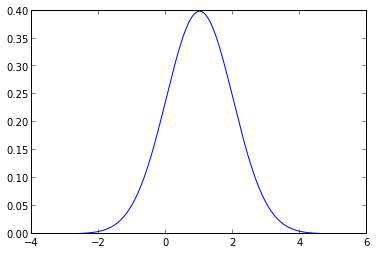

In [184]:
xs = linspace(-4,6,1000)
C = (amax(xs)-amin(xs))/xs.size
pmu0 = norm.pdf(xs,loc=1)
plot(xs,pmu0)
C*sum(pmu0)

Now we obtain a training sample $x=2$ and update our estimate.

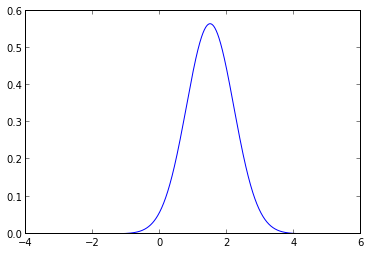

In [198]:
pmu1 = norm.pdf(xs,loc=2.0)*pmu0
pmu1 /= C*sum(pmu1)
plot(xs,pmu1)

We can also compute the map estimate $\hat{\mu}$ for the parameter.

In [199]:
mumap = xs[argmax(pmu1)]
print mumap

1.4954954955

Let's now compute $p(x|D)$ and compare it with $p(x|\hat{\mu})$.

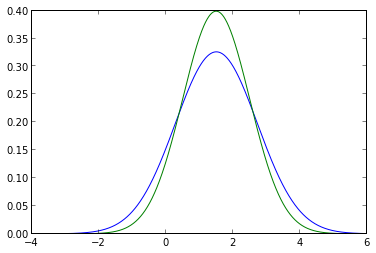

In [196]:
result = zeros(xs.shape)
for i,mu in enumerate(xs):
    weight = pmu1[i]
    result += weight * norm.pdf(xs,loc=mu)
result /= C*sum(result)
plot(xs,result)
plot(xs,norm.pdf(xs,loc=muml))

Finally, let's compute posteriors using the MAP and Bayesian estimates.

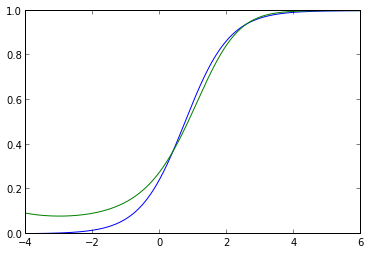

In [200]:
p1 = norm.pdf(xs,loc=0)
p2map = norm.pdf(xs,loc=mumap)
p2b = result
plot(xs,p2map/(p1+p2map))
plot(xs,p2b/(p1+p2b))

As you can see, the MAP-based estimate underestimates the error rate for smaller values of $x$.

In addition, it results in different decision boundaries.

In [203]:
dbmap = xs[find(p2map/(p1+p2map)>0.5)[0]]
dbb = xs[find(p2b/(p1+p2b)>0.5)[0]]
print dbmap,dbb

0.754754754755 0.844844844845

Bayesian vs Maximum Likelihood Example
==============================

Let's apply this to another, simple example and compare maximum likelihood and bayesian approaches
~
Assume that the samples $x$ come from a uniform density over the interval $[0,\theta]$

$$p(x|\theta) = U(x;0,\theta) = 1/\theta \cdot \lfloor x\in[0,\theta]\rfloor$$

We also assume a prior

$$p(\theta) = U(\theta;0,10)$$

That is, $\theta$ is distributed uniformly over the interval $[0,10]$

Let's assume we see a sequence of training examples $D = \\{4,7,2\\}$

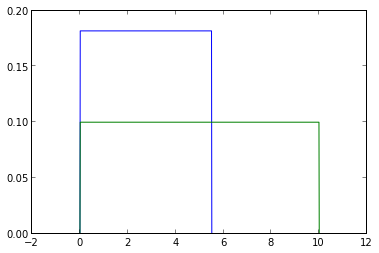

In [225]:
xs = linspace(-1,11,1000)
mus = xs
C = (amax(xs)-amin(xs))/len(xs)
def pxt(x,mu): return (xs>=0)*(x<=mu)*1.0/maximum(mu,1e-6)
plot(xs,pxt(xs,5.5))
pmu = (xs>=0)*(xs<=10)*0.1
plot(xs,pt)

Now assume we draw the sample $x_1=4$.  How should we update our estimate?

$$p(\mu|x) = \frac{p(x|\mu) p(\mu)}{p(x)}$$

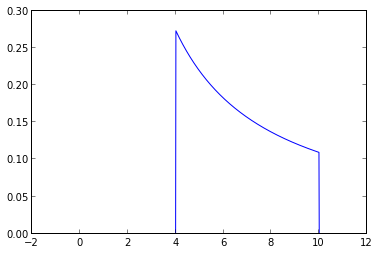

In [228]:
pmu1 = pxt(4,mus)*pmu
pmu1 /= C*sum(pmu1)
plot(xs,pmu1)

The maximum likelihood estimate is clearly at $\mu=4$.  If we now plug this
into $p(x|\mu)$ we get...

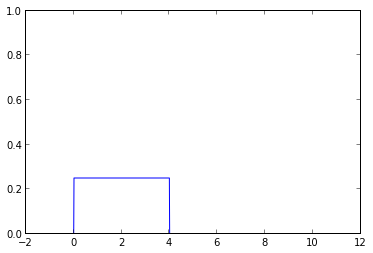

In [229]:
ylim(0,1)
plot(xs,pxt(xs,4))

This is odd because it predicts that only values between 0 and 4 can occur.
But the training sample $x_1=4$ only excludes that $\mu\lt4$; it doesn't 
exclude any values greater than $4$.

What's the Bayesian estimate?

$$p(x|D) = \int p(x|\theta) p(\theta|D) d\theta \propto \int_0^{10} 1/\theta \cdot \lfloor x\in[0,\theta]\rfloor \cdot 1/\theta \cdot \lfloor \theta\in[4,10]\rfloor d\theta
= \int_{x_1}^{10} 1/\theta^2 \cdot \lfloor x\in[0,\theta]\rfloor d\theta$$

You can either think about it, or we can simply perform this integral numerically.

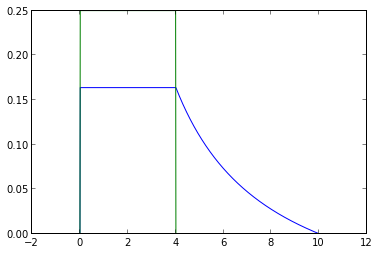

In [230]:
result = zeros(xs.shape)
for i,mu in enumerate(mus):
    weight = pmu1[i]
    result += weight * pxt(xs,mu)
result /= C*sum(result)
plot(xs,result)
plot(xs,pxt(xs,4))

Now assume we get another sample, $x_1=7$

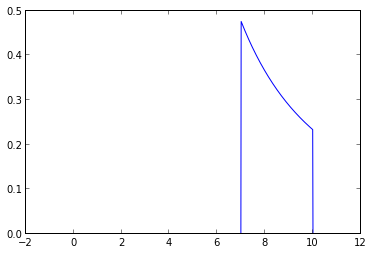

In [236]:
pmu2 = pxt(7,mus)*pmu1
pmu2 /= C*sum(pmu2)
plot(xs,pmu2)

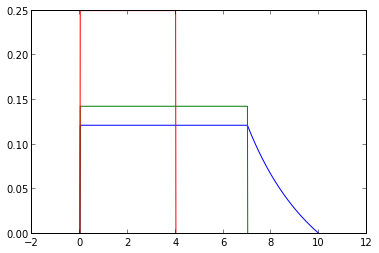

In [237]:
result = zeros(xs.shape)
for i,mu in enumerate(mus):
    weight = pmu2[i]
    result += weight * pxt(xs,mu)
result /= C*sum(result)
plot(xs,result)
plot(xs,pxt(xs,7))
plot(xs,pxt(xs,4))

This is even weirder.  After seeing the first sample, the maximum likelihood
estimator predicts only values between 0 and 4 occurring, but after seeing
another training sample, it is changing its mind and now predicts that values
between 0 and 7 can occur.

The Bayesian estimator, in contrast, "knows" that the parameter must be greater than 7,
so it predicts a uniform distribution for the interval [0...7] and then a tradeoff
between the parameter distribution and the uniform distribution of the parameters.

The last sample illustrates this further.

A sample of $x_3=2$ doesn't cause any update to the maximum likelihood estimator,
but it does cause an update to posterior distribution.

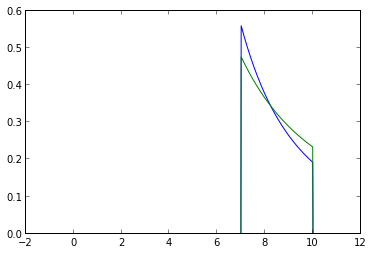

In [238]:
pmu3 = pxt(2,mus)*pmu2
pmu3 /= C*sum(pmu3)
plot(xs,pmu3)
plot(xs,pmu2)

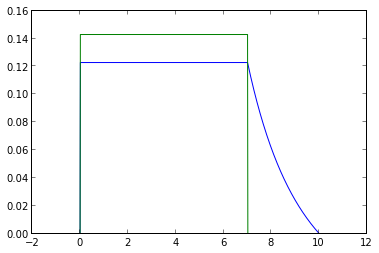

In [239]:
result = zeros(xs.shape)
total = 0
for i,mu in enumerate(mus):
    weight = pmu3[i]
    result += weight * pxt(xs,mu)
    total += weight
result /= total
plot(xs,result)
plot(xs,pxt(xs,7))

In fact, if we repeat the same process with a lot of samples (in this case
the true parameter is 7), we see that the Bayesian parameter estimate
becomes an increasingly peaked distribution close to the true value.

I.e., if, out of 100 samples, we haven't seen a value greater than 7,
then the probability that the mean is significantly greater than 7 must
be very small.

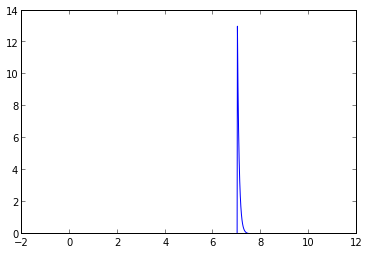

In [240]:
p = pmu.copy()
for i in range(100):
    p = pxt(rand()*7,mus)*p
    p /= C*sum(p)
plot(mus,p)

Loss Functions for Parameter Estimation
========================================

Consider $p(\theta|x)$ from the previous example again.

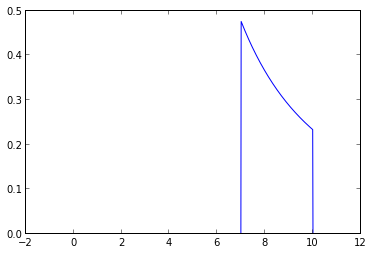

In [241]:
plot(mus,pmu2)

Assume now that we are supposed to return a "best estimate" of the parameter.

By itself, that isn't sufficient.

But now assume that we are given a loss function: if our estimate is with in $\pm 0.5$ of the true value,
we don't need to pay a penalty, otherwise, we need to pay a penalty of 1.  What value should we return?

The most likely value is 7, but no values less than 7 can occur.

Therefore, it is better to return 7.5.  That way, not only do we have the most likely value, but we also
get all the probability mass between 7 and 8 as well and our expected loss is about half of what it would be
if we had returned 7.

Now assume we are penalized if we are outside the range $\pm 1$ from the true value.
By the same reasoning, our parameter estimate should now be 8.

As you can see from this simple example, there is not "best" answer to the parameter estimation
problem; our answer depends on the loss function.

But we can see that for any symmetric loss function, the value 7 (the maximum likelihood estimate)
is never the optimal answer.